# Ejercicio Minimización :
Un estudiante de administración de empresas del Nowledge College necesita completar un total de 65 cursos para graduarse. El número de cursos de administración tendrá que ser mayor que o igual a 23. El número de cursos ajenos al área de administración deberá ser mayor que o igual a 20. El curso de administración promedio requiere un libro de texto que cuesta 60 dolares e implica 120 horas de estudio. Los cursos ajenos al área de administración requieren un libro de texto que cuesta 24 dolares e implican 200 horas de estudio. El estudiante dispone de un presupuesto de 3,000 dolares para libros.

## Definicion del problema:
¿Con qué combinación de cursos de administración y otros ajenos a esta área se minimizaría el número total de horas de estudio?



In [ ]:
# Creamos la tabla de problema  (opcional)
import pandas as pd #Es una librería de Python especializada en el manejo y análisis de estructuras de datos.

df = pd.DataFrame()
# Creamos las columnas vacias
df['Horas de estudio'] = None 
df['Costo por libro (usd)'] = None

df.loc['Cursos administracion'] = ['120', '60']
df.loc['Cursos ajenos a administraccion'] = ['200', '24']
df.loc['Presupuesto para libros (dolares)'] = ['', '3000']
df # Imprimimos la tabla

,Horas de estudio,Costo por libro (usd)
Cursos administracion,120,60
Cursos ajenos a administraccion,200,24
Presupuesto para libros (dolares),,3000


In [ ]:
pip install pulp # Instalamos Pulp porque este no se encuentra instalado por defecto en colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerías necesarias
from pulp import * # Esta librería nos proporciona un lenguaje para modelar y resolver problemas de optimización utilizando programación lineal.
import matplotlib.pyplot as plt # Matplotlib nos permita graficar
import numpy as np # Nos permite generacion y manejos de datos rapido.

In [ ]:
# Creamos un  objeto del modelo
prob = LpProblem("Problema_del_Estudiante", LpMinimize)

In [ ]:
# Definimos las variables de decision
x1 = LpVariable("x1", 0) # Cursos de Administración que cursará el estudiante
x2 = LpVariable("x2", 0) # Cursos ajenos al área de Administración que cursará el estudiante

Vamos a minimizar la siguiente función objetivo:
$Z{min} = 120x_1 + 200x_2$

con las siguientes restricciones:
$x_{1} + x_{2} \geq 65 \\
x_1 \geq 23 \\
x_2 \geq 20 \\
60x_1 + 24x_2 \leq 3000 \\
x_i \geq 0$

In [ ]:
# Definimos la funcion objetivo
prob += 120*x1 + 200*x2

In [ ]:
# Definimos las restricciones
prob += x1 + x2 >= 65 , "r1" # Cursos Necesarios para graduarse
prob +=  x1 >= 23 , "r2" # Cantidad de Cursos de Administración
prob +=  x2 >= 20 , "r3" # Cantidad de Cursos ajenos a Administración
prob +=  60*x1 + 24*x2 <= 3000, "r4" # Presupuesto del estudiante

In [ ]:
# Resolvemos el problema de programacion lineal
prob.solve()

1

In [ ]:
# Imprimimos los resultados
print ("Estado: ", LpStatus[prob.status])

Estado:  Optimal


In [ ]:
print("La solución visual se encontraría en el punto:")
for v in prob.variables():
  print(f"{v.name} = {v.varValue}")

La solución visual se encontraría en el punto:
x1 = 40.0
x2 = 25.0


In [ ]:
print("El valor optimo de la funcion objetivo es = ", value(prob.objective))

El valor optimo de la funcion objetivo es =  9800.0


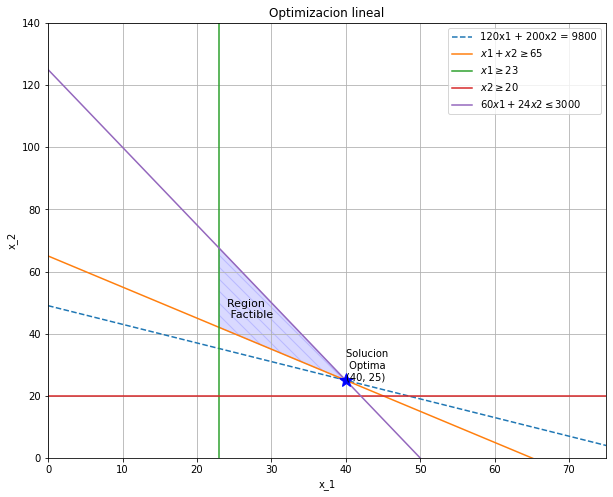

In [ ]:
# Resolviendo la optimizacion graficamente.
x = np.arange(0, 160, 20) # valores del 0 al 160 con incrementos de 20
fobjetivo = ((9800 - 120*x)/200) # 120x1 + 200x2 = 9800
r1 = 65-x # x1 + x2 = 65
r2 = [23 for x in x] # x1 = 23
r3 = [20 for x in x] # x2 = 20
r4 = ((3000 - 60*x)/24) # 60x1 + 24x2 = 3000

plt.figure(figsize=(10,8))
# Trazamos las funciones (Restricciones, F.Objetivo)
plt.plot(x, fobjetivo,'--', label = '120x1 + 200x2 = 9800')
plt.plot(x, r1, label = '$x1 + x2 \geq 65$')
plt.plot(r2, x, label = '$x1 \geq 23$')
plt.plot(x, r3, label= '$x2 \geq 20$')
plt.plot(x, r4, label = '$60x1 + 24x2 \leq 3000$')
plt.plot(40, 25, 'b*', markersize=15) # Punto optimo

# Región factible
x = [ 23, 23, 40] # Definimos los vertices de la region
y = [ 42, 135/2, 25]

plt.fill(x, y, alpha=0.15,hatch='\\\\', color='b') # Pintamos la region factible

plt.text(24, 45, 'Region \n Factible', size = '11')
plt.annotate('Solucion \n Optima\n(40, 25)', xy = (40, 25))

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.axis([0, 75, 0, 140])
plt.grid(True)
plt.title('Optimizacion lineal')
plt.legend()
plt.show()

# Interpretacion de los resultados
Con los valores obtenidos de X = 40, Y = 25, se minimizará las horas de estudio, teniendo como resultado 9800 horas.